In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
plt.rc('text', usetex=True)
np.set_printoptions(precision=4)


In [45]:
fajli = !ls *.dat
#imena = [i.split(".")[0] for i in fajli]
seznam = {}
for fajl in fajli:
    ime = fajl.split(".")[0]
    seznam[ime] = np.genfromtxt(fajl)
seznam["co2" ] = np.genfromtxt("co2.dat").T[1]

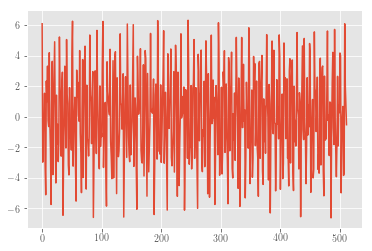

In [50]:
val3 = seznam["val3"]
plt.plot(val3)

Testiram, ali je stacionarno: Augmented Dick-Fuller test

In [54]:
from scipy.statsmodels.tsa.stattools import adfuller
result = adfuller(val3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ModuleNotFoundError: No module named 'scipy.statsmodels'

In [56]:
!pip install statsmodels

    100% |████████████████████████████████| 7.4MB 749kB/s 
    100% |████████████████████████████████| 235kB 1.6MB/s 


In [61]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(val3)
print(f'ADF Statistic: {result[0]:0.4}' )
print(f'p-value: {result[1]:0.4}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3}')

ADF Statistic: -5.982
p-value: 1.827e-07
Critical Values:
	1%: -3.44
	5%: -2.87
	10%: -2.57


In [62]:
np.__version__

'1.15.4'

In [128]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

a[200]

IndexError: index 200 is out of bounds for axis 0 with size 15

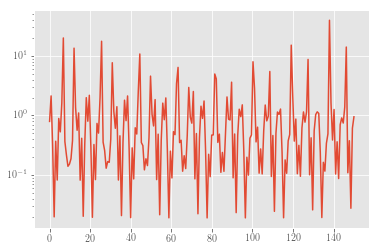

In [168]:
def autocorr2(x):
    r2=np.fft.ifft(np.abs(np.fft.fft(x))**2).real
    c=(r2/x.shape-np.mean(x)**2)/np.std(x)**2
    return c[:len(x)//2]

Rji = autocorr2(val3)

def avtokorelacija(x):
    N = len(x)
    rezultat = np.empty_like(x)
    for i in range(N):
        vsota = 0
        for n in range(N-i-1):
            try:
                vsota += x[n]*x[n+i]
            except IndexError:
                pass
        rezultat[i] = vsota/(N-i)
    return rezultat
            
    

def dobi_aje(Rji, p):
    from scipy.linalg import solve_toeplitz, toeplitz
    rezultat = solve_toeplitz((Rji[:p], Rji[:p]), Rji[1:p+1])
    #print(rezultat)
    return rezultat

def psd(aji, omege):
    """vrne obliko psdja pri danih frekvencah"""
    rez = np.empty_like(omege)
    for i, omega in enumerate(omege):
        vsota = np.sum([a * np.exp(-1j*omega*(i+1)) for i, a in enumerate(aji)])
        rez[i]= np.abs(1+vsota)**(-2)
    return rez
plt.plot(np.linspace(0,150,200),psd(dobi_aje(avtokorelacija(val3),30), np.linspace(0,150,200)))
plt.semilogy()
plt.show()

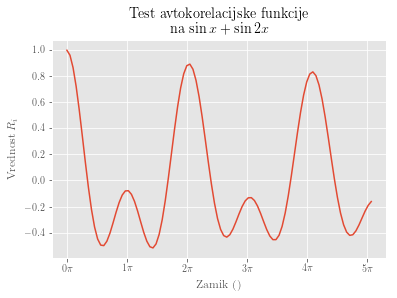

In [189]:
def autocorr2(x):
    r2=np.fft.ifft(np.abs(np.fft.fft(x))**2).real
    c=(r2/x.shape-np.mean(x)**2)/np.std(x)**2
    return c[:len(x)//2]
razpon = np.linspace(0,2*16,200)
test = np.sin(razpon)+np.sin(2*razpon)
ticks = np.arange(0,16, np.pi)
labels = [str(i)+r"$\pi$" for i,_ in enumerate(ticks)]
plt.plot(razpon[:len(razpon)//2], autocorr2(test))
plt.title("Test avtokorelacijske funkcije\n"+r"na $\sin{x}+\sin{2x}$")
plt.ylabel(r"Vrednost $R_i$")
plt.xlabel("Zamik ()")
plt.xticks(ticks=ticks, labels=labels)
plt.savefig("1-0-test-avtokorelacije.pdf")
plt.show()

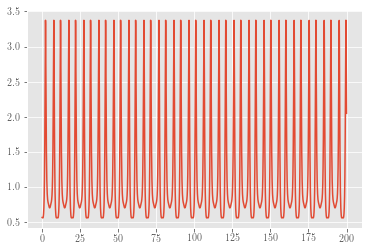

In [202]:
def autocorr2(x):
    r2=np.fft.ifft(np.abs(np.fft.fft(x))**2).real
    c=(r2/x.shape-np.mean(x)**2)/np.std(x)**2
    return c[:len(x)//2]

def resi_yule_walkerja(Rji, p):
    """resi yule walkerjev sistem, vrne vektor ajev"""
    from scipy.linalg import toeplitz
    matrika = toeplitz(Rji[:p])
    return np.linalg.solve(matrika, Rji[1:p+1])


def psd(aji, omege):
    def psd_za_eno_omego(omega):
        return np.abs(1-np.sum([a * np.exp(-2j/np.pi*omega*(i+1)) for i,a in enumerate(aji)]))**(-2)
    return np.array([psd_za_eno_omego(omega) for omega in omege])
Rji = autocorr2(val3)
aji = resi_yule_walkerja(Rji, 5)
frekvencni_razpon = np.linspace(0,200,3000)
plt.plot(frekvencni_razpon, psd(aji, frekvencni_razpon))


In [207]:
seznam["co2"][seznam["co2"]==-99.99].sum()

-699.93

In [208]:
len(seznam["co2"])

611